# HW01: ML Lib Intro (библиотеки машинного обучения)

**Оформление ДЗ**:

- Выполненное ДЗ сохраните в файл ``ml_b2c2025q2_<фамилия>_<имя>_hw01.ipynb`` (пример ``ml_b2c2025q2_dral_alexey_hw01.ipynb``)
- Открыть форму сдачи ДЗ: [ML-B2C-2025-Q2](https://forms.gle/1cS6HPGgvdSzPfuc9)
- Выбрать задание: ``HW01: ML Lib Intro``
- Указать ваш логин на образовательной платформе (логин EDX)
- Загрузить файл с решением

**Дополнительные ссылки**
- Настройка локального окружения: https://github.com/big-data-team/ml-course
- Датасеты UCI: https://archive.ics.uci.edu/
- BDT Streamlit Demo обучения kNN: https://bdt-knn-demo.streamlit.app/

**Вопросы**:
- Свои вопросы присылайте в Телеграм.

**Фидбек**:
- Пожалуйста, оставьте свой отзыв после выполнения домашнего задания по сссылке:

   https://forms.gle/GnuG1EpcgQd1wRdV7

### Вопросы на понимание

1. Перечислите какие задачи машинного обучения бывают (с точки зрения математики, а не области применения)
2. Напишите тезисно, своими словами для чего используется каждая из библиотек: numpy, matplotlib, pandas, seaborn, scipy, sklearn, streamlit
3. В чем смысл деления выборки на train и test?
4. Вы используете алгоритм классификации kNN с числом соседей k=2 для задачи классификации на 2 класса ("A" и "B"). Выберем произвольный объект, который однозначно классифицируется классом "A". Может ли этот объект классифицироваться классом "B", если мы увеличим число соседей до k=3? Ответ поясните.
5. Какой план действий, если возникает ошибка при исполнении кода?

<ваши ответы - здесь>

### Часть 1. Разогрев (30%)

In [2]:
import numpy as np
import pandas as pd

In [ ]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: rng.integers
rng = np.random.default_rng()
A = rng.integers(0, 101, size=(10, 10))

[[85 14 34 68 80 78 50 61 94 96]
 [55 61 15 53 19 98 74 13 91 54]
 [ 9 70 62 68 49 11 81 40 10 70]
 [ 8 74 27 36 72  5 65 62 11 58]
 [82 38 78 82  7 64 22 99 56 26]
 [ 3 89  3 18 72 17  9 65 91 21]
 [97 21 84 43 48 32 68 19  3 19]
 [18 67 35 76  7 16 36  9 14 46]
 [52 27  7 35 76 23 70 44 24 81]
 [ 6 20 33 76  9 78 23 14 82 43]]


In [ ]:
# Посчитайте средние значения в матрице по столбцам
column_means = A.mean(axis=0)


[41.5 48.1 37.8 55.5 43.9 42.2 49.8 42.6 47.6 51.4]


In [ ]:
# Транспонируйте матрицу A
A_transposed = A.T

In [ ]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A
A_elements_product = A * A.T

In [6]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product
B = np.dot(A, A)

In [7]:
# Проверим вас. Если все хорошо, данная ячейка отработает без ошибки
assert(np.array_equal(B, np.linalg.matrix_power(A, 2)))

In [ ]:
# Отлично! Сгенерируйте вектор v из 20 идущих подряд целых чисел начиная с 1
v = np.arange(1, 21)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [9]:
# Перемешайте его случайным образом
# hint: np.random.shuffle
# Warning! Прочитайте документацию этой функции
np.random.shuffle(v)

In [10]:
# Проверим Вас
assert(v is not None)

In [ ]:
# Выведите максимум вектора v
v_max = v.max()
print(v_max)

In [11]:
# Сохраните индекс максимального элемента вектора v в переменную max_ind
max_ind = v.argmax()

In [12]:
# Проверим Вас
assert(v[max_ind] == v.max())

In [13]:
# Отсортируйте v по убыванию
v_sorted = np.sort(v)[::-1]

In [14]:
assert(np.array_equal(v_sorted, np.arange(20, 0, -1)))

Отлично. Не забывайте про функции np.percentile, np.mean, np.median etc.

И не забывайте читать документацию.

### Часть 2. Визуализация и оптимизация (40%)

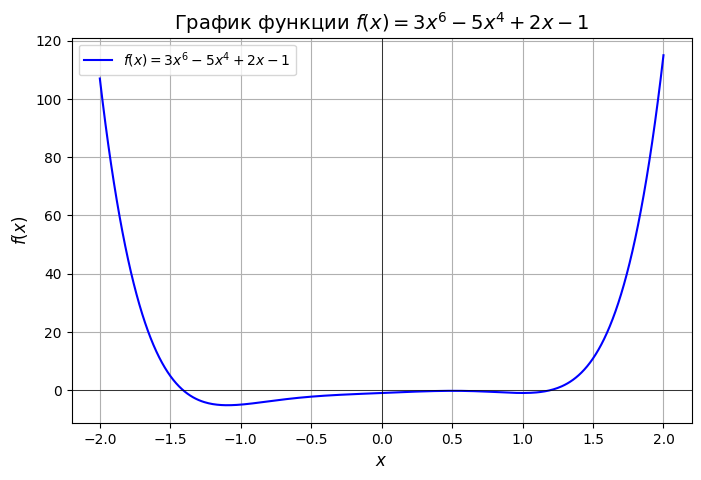

In [15]:
# Нарисуйте график функции f(x) = 3 * x^6 - 5 * x^4 + 2 * x - 1
# Используйте TeX-нотацию для того, чтобы подписать график функции
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3 * x**6 - 5 * x**4 + 2 * x - 1

x = np.linspace(-2, 2, 400)

y = f(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'$f(x) = 3x^6 - 5x^4 + 2x - 1$', color='b')

plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$f(x)$', fontsize=12)
plt.title(r'График функции $f(x) = 3x^6 - 5x^4 + 2x - 1$', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)

plt.show()


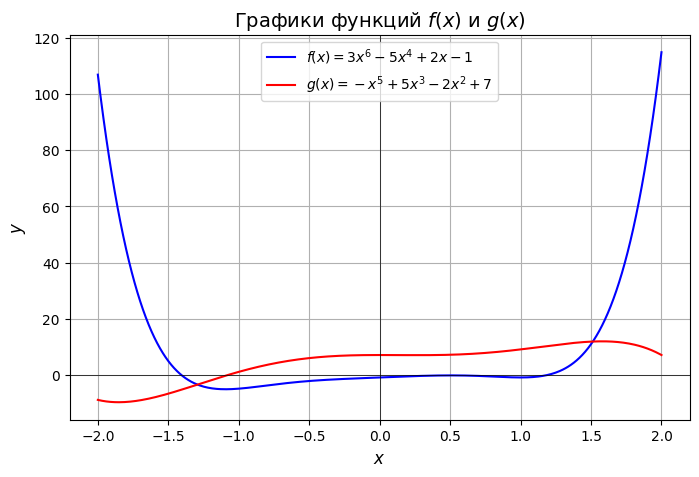

In [17]:
# Отобразите 2 функции на одном графике
# 1. f(x) = 3 * x^6 - 5 * x^4 + 2 * x - 1
# 2. g(x) = - x^5 + 5 * x^3 - 2 * x^2 + 7
# Используйте TeX-нотацию для того, чтобы подписать график функции
def g(x):
    return -x**5 + 5 * x**3 - 2 * x**2 + 7

x = np.linspace(-2, 2, 400)  

y_f = f(x)
y_g = g(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y_f, label=r'$f(x) = 3x^6 - 5x^4 + 2x - 1$', color='b')
plt.plot(x, y_g, label=r'$g(x) = -x^5 + 5x^3 - 2x^2 + 7$', color='r')

plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$y$', fontsize=12)
plt.title(r'Графики функций $f(x)$ и $g(x)$', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
# Найдите 1 локальный минимум для каждой функции с помощью scipy
from scipy.optimize import minimize_scalar

min_f = minimize_scalar(f, bounds=(-2, 2), method='bounded')
min_g = minimize_scalar(g, bounds=(-2, 2), method='bounded')

In [ ]:
# Найдите минимум функции от двух переменных f(x, y) = 3 * x * y + 3 * x^2 - 4 * y + 7 - 5 * x^5
<your_code_here>

C:\Users\Bakhyt\AppData\Local\Temp\ipykernel_12188\2911500185.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 60)` for the same effect.

  sns.pointplot(x="day", y="tip", data=tips, ci=60, capsize=0.1, color='b')


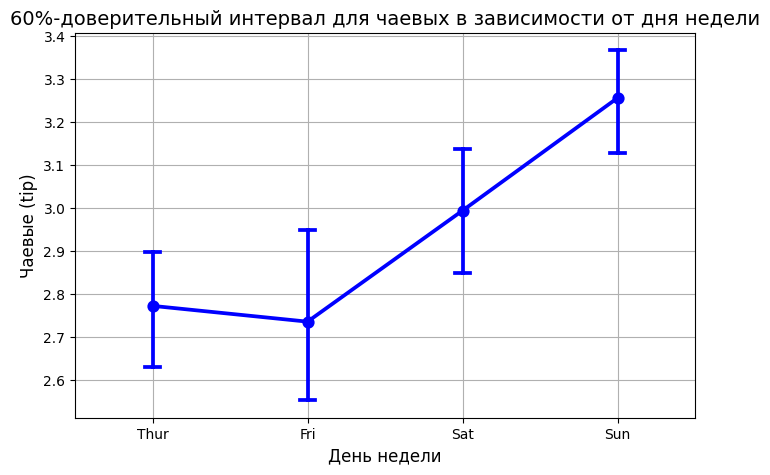

In [2]:
# Возьмите dataset "tips" из seaborn и отобразите 60%-доверительный интервал для параметра "tip"
# в зависимости от дня недели
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

plt.figure(figsize=(8, 5))
sns.pointplot(x="day", y="tip", data=tips, ci=60, capsize=0.1, color='b')

plt.xlabel("День недели", fontsize=12)
plt.ylabel("Чаевые (tip)", fontsize=12)
plt.title("60%-доверительный интервал для чаевых в зависимости от дня недели", fontsize=14)
plt.grid(True)

plt.show()


### Часть 3. Обучение kNN для Titanic (30%)

In [5]:
%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 5.2 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.1 MB 13.2 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 14.8 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 14.2 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ----- ---------------------------------- 5.8/41.2 MB 27.1 MB/s eta 0:00:02
   ------------- -------------------------- 14.4/41.2 MB 34.9 MB/s eta 0:00:01
   ----------------- ---------------------- 17.6/41.2 MB 31.6 MB/s eta 0:00:01
   ------------------- -------------------- 20.2/41.2 MB 26.0 MB/s eta 0:00:01
   --------------------- ------------------ 22.

In [11]:
# Скачайте train и test выборку датасета Titanic (также доступно в материалах семинара)
# и прочитайте с помощью pandas
import pandas as pd

train = pd.read_csv("D:\\Bakhyt\\train.csv")
test = pd.read_csv("D:\\Bakhyt\\test.csv") 



In [14]:
import numpy as np

df_train = train.copy()
df_test = test.copy()

Y = df_train['Survived']

drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived']
df_train.drop(columns=drop_cols, inplace=True)
df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_train['Age'].median(), inplace=True)

df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_test['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

if df_test['Fare'].isna().sum() > 0:
    df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'])
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked'])

train_cols = df_train.columns
test_cols = df_test.columns

for col in train_cols:
    if col not in test_cols:
        df_test[col] = 0

for col in test_cols:
    if col not in train_cols:
        df_test.drop(columns=[col], inplace=True)

X = df_train
X_test = df_test

print("Train shape:", X.shape)
print("Test shape:", X_test.shape)


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
Train shape: (891, 10)
Test shape: (418, 10)


C:\Users\Bakhyt\AppData\Local\Temp\ipykernel_12188\3023094629.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
C:\Users\Bakhyt\AppData\Local\Temp\ipykernel_12188\3023094629.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.67039106 0.6741573  0.71348315 0.73595506 0.7247191 ]
Mean accuracy: 0.7037411336388174


In [16]:
# Добейтесь качества 0.7 по метрике accuracy локально, за счет добавления новых факторов
df_train = train.copy()
df_test = test.copy()

y = df_train['Survived']

df_train.drop(['PassengerId','Name','Ticket','Cabin','Survived'], axis=1, inplace=True)
df_test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_test['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=[0,12,18,60,100], labels=False)
df_test['AgeGroup']  = pd.cut(df_test['Age'],  bins=[0,12,18,60,100], labels=False)

df_train = pd.get_dummies(df_train, columns=['Sex','Embarked'])
df_test = pd.get_dummies(df_test, columns=['Sex','Embarked'])

for col in df_train.columns:
    if col not in df_test.columns:
        df_test[col] = 0
for col in df_test.columns:
    if col not in df_train.columns:
        df_test.drop(col, axis=1, inplace=True)

X = df_train
X_test = df_test

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("Accuracy with new feature AgeGroup:", scores.mean())


Accuracy with new feature AgeGroup: 0.7048647291444354


C:\Users\Bakhyt\AppData\Local\Temp\ipykernel_12188\3877011427.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
C:\Users\Bakhyt\AppData\Local\Temp\ipykernel_12188\3877011427.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

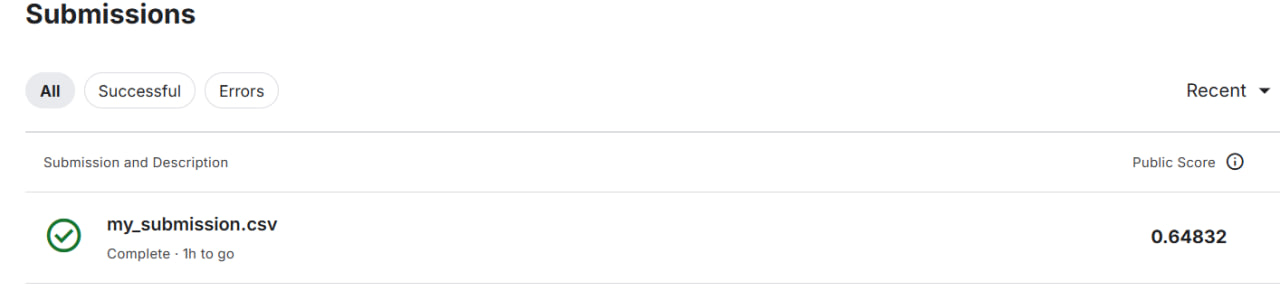

In [19]:
# Приложите screenshot submit в Kaggle на публичном Leaderboard с качеством более чем 0.7
from IPython.display import Image
Image(filename="D:\Bakhyt\submission_on_kaggle.jpg")


### Часть 4. (бонус) Создание Dashboard обучения модели ML на Streamlit (10%)

Хочешь прокачать свой github и научиться делать красивые визуализации с интерактивным обучением моделей машинного обучения? Тогда переходи по ссылке и выполняй дополнительное задание на Streamlit: https://github.com/big-data-team/ml-course/blob/master/streamlit_assigment.md

## Решил ДЗ - дай обратную связь ;)

Надеемся, было интересно и полезно.

Пожалуйста, оставьте обратную связь по этому домашнему заданию: https://forms.gle/GnuG1EpcgQd1wRdV7